# Exploratory Data Analysis in Python.

Arthur Kennedy | Charles Rehder | Luca Comba | Mohamed Elshahawi | Roban Shrestha

---

## Introduction

**What is Exploratory Data Analysis (EDA)?**

*"One thing the data analyst has to learn is how to expose himself to what his data are willing–or even anxious–to tell him. Finding clues requires looking in the right places and with the right magnifying glass."*

*– John Tukey, Exploratory Data Analysis, p. 21*

Exploratory Data Analysis is the first step in getting to know a dataset and uncovering what insights it has to offer. Loading, manipulating, and visualizing the data are all keys steps in getting the most from data you have. But, as the quote above alludes to, you need the right tools to be able to find the right insights. In this notebook, our group uses **pandas**, **numpy**, **matplotlib**, and **seaborn** to manipulate and visualize the data and explore possibilities we found interesting. 

**What data are we exploring in this project?**



Our group is looking into the *Car Features and MSRP* dataset, found [here](https://www.kaggle.com/CooperUnion/cardataset). This data contains 16 columns and over 11,00 rows detailing statistics about different models of cars. Different features include engine details like the number of cylinders and horsepower and also consumer-level information like price and popularity score. We hope to use this dataset to demonstrate the insights that can be gained from the Exploratory Data Analysis process and hone in on some key insights that we found interesting.



---



## 1. Importing the required libraries for EDA

Below we load the libraries needed for Exploratory Data Analysis. Loading all the requirments at the top of the notebook is common practice and libraries we use are prolific, well-support analysis libraries.

**Data loading and manipulation**: pandas, numpy

**Data visualization**: seaborn, matplotlib

*Note: `%matplotlib inline` makes it such that plots render directly in the notebook and is IPython specific functionality. `sns.set(color_codes=True)` aligns the shortened color codes that matplotlib uses to those used by seaborn.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Loading data is the second step in the process and luckily pandas allows for plenty of flexibility when loading data. With it, users can load data from a variety of formats, including the clipboard, MS Excel documents, JSON, and many more. The full list of functions can be found [here](https://pandas.pydata.org/docs/reference/io.html). In this notebook, we will be using `read_csv` to read in the *Car Features and MSRP* dataset.


Pandas also provides functions to peak at a few rows of the dataset, like `df.head()` and `df.tail()`. These are helpful when analysts want to get an initial feel for the data.

In [2]:
# load data into pandas dataframe
df = pd.read_csv("data/data.csv")

# display first five rows of data
df.head(5)               

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# display last five rows of data.
df.tail(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


---

## 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

##### Descriptive Summary (Before cleaning)

In [5]:
summary_stats = round(df.describe(),2).T
summary_stats['median'] = df.select_dtypes(include="number").median()
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max,median
Year,11914.0,2010.38,7.58,1990.0,2007.0,2015.0,2016.00,2017.0,2015.0
Engine HP,11845.0,249.39,109.19,55.0,170.0,227.0,300.00,1001.0,227.0
Engine Cylinders,11884.0,5.63,1.78,0.0,4.0,6.0,6.00,16.0,6.0
Number of Doors,11908.0,3.44,0.88,2.0,2.0,4.0,4.00,4.0,4.0
highway MPG,11914.0,26.64,8.86,12.0,22.0,26.0,30.00,354.0,26.0
city mpg,11914.0,19.73,8.99,7.0,16.0,18.0,22.00,137.0,18.0
Popularity,11914.0,1554.91,1441.86,2.0,549.0,1385.0,2009.00,5657.0,1385.0
MSRP,11914.0,40594.74,60109.10,2000.0,21000.0,29995.0,42231.25,2065902.0,29995.0


In [6]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
Make,11914,48,Chevrolet,1123
Model,11914,915,Silverado 1500,156
Engine Fuel Type,11911,10,regular unleaded,7172
Transmission Type,11914,5,AUTOMATIC,8266
Driven_Wheels,11914,4,front wheel drive,4787
Market Category,8172,71,Crossover,1110
Vehicle Size,11914,3,Compact,4764
Vehicle Style,11914,16,Sedan,3048


##### Key Insights

1. **Year**
- The dataset spans vehicles from **1990 to 2017**, with a **median year of 2015**.
- Most vehicles are recent models, as indicated by the clustering around **2015–2016**.

2. **Engine HP**
- Horsepower ranges from **55 HP** to **1001 HP**, with a **median of 227 HP**.
- The distribution suggests a mix of consumer-grade and high-performance vehicles, with a small number of extreme outliers.

3. **Engine Cylinders**
- The number of cylinders ranges from **0 to 16**, with a **median of 6 cylinders**.
- The value **0** might indicate missing or anomalous data.

4. **Number of Doors**
- Most vehicles have **4 doors**, as reflected in the **median of 4** and the fact that 75% of vehicles have **4 doors** or fewer.
- Two-door vehicles make up a smaller portion of the dataset.

5. **highway MPG**
- Highway MPG varies widely from **12 MPG** to a significant outlier of **354 MPG**, with a **median of 26 MPG**.
- This high maximum suggests the presence of extreme or anomalous data points.

6. **city mpg**
- City MPG spans **7 MPG** to **137 MPG**, with a **median of 18 MPG**.
- Similar to highway MPG, the maximum value suggests some anomalies in the dataset.

7. **Popularity**
- Popularity scores range from **2** to **5657**, with a **median of 1385**.
- The skewed distribution indicates a few extremely popular models significantly influencing the mean.

8. **MSRP**
- Prices range from **$2000** to a significant outlier of **$2,065,902**, with a **median of $29,995**.
- While the mean is elevated due to high-end vehicles, most vehicles fall within a reasonable range of **$21,000 to $42,231**.

---

##### Observations
1. **Anomalies**: Extreme outliers are evident in `highway MPG`, `city mpg`, and `MSRP`. Cleaning the data could help improve analysis.
2. **Vehicle Characteristics**: 
   - The dataset mainly consists of vehicles with **4 doors**, moderate engine power (~227 HP), and cylinders (~6).
   - Fuel efficiency is typical for standard vehicles, with city and highway MPG medians of **18 MPG** and **26 MPG**, respectively.
3. **Price Distribution**: The price range highlights a market catering to both budget and high-end vehicles, with most prices clustering around **$30,000**.



---



## 4. Identifying Columns of Interest

In the original EDA, columns such as `Transmission Type` and `Driven_Wheels` were included in the EDA, but those columns was never utilized in any of the analysis. We are interested in identifying relationships between various columns. For example, how has the fuel consumption changed over the years? Another example is how does popularity impact the pricing?

In [7]:
df = df.drop(['Engine Fuel Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,28,18,3916,34500


## 5. Labelling Data Columns

For readability, we're changing the labels of the columns to add clarity.

In [8]:
df = df.rename(columns={'Engine HP': 'Horsepower', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission','highway MPG': 'MPG-Highway', 'city mpg': 'MPG-City', 'Popularity':'Rank', 'MSRP': 'Price' })
df.head(5)

,Make,Model,Year,Horsepower,Cylinders,Transmission,MPG-Highway,MPG-City,Rank,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,28,18,3916,34500


## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [9]:
df.shape

(11914, 10)

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1011, 10)


Now let us remove the duplicate data because it's ok to remove them.

In [11]:
df.count()      # Used to count the number of rows

Make            11914
Model           11914
Year            11914
Horsepower      11845
Cylinders       11884
Transmission    11914
MPG-Highway     11914
MPG-City        11914
Rank            11914
Price           11914
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [12]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Horsepower,Cylinders,Transmission,MPG-Highway,MPG-City,Rank,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,28,18,3916,34500


In [13]:
df.count()

Make            10903
Model           10903
Year            10903
Horsepower      10834
Cylinders       10873
Transmission    10903
MPG-Highway     10903
MPG-City        10903
Rank            10903
Price           10903
dtype: int64

##### Descriptive Summary

In [14]:
summary_stats = round(df.describe(),2).T
summary_stats['median'] = df.select_dtypes(include="number").median()
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max,median
Year,10903.0,2010.94,7.00,1990.0,2007.0,2015.0,2016.0,2017.0,2015.0
Horsepower,10834.0,254.58,109.77,55.0,174.0,240.0,303.0,1001.0,240.0
Cylinders,10873.0,5.67,1.80,0.0,4.0,6.0,6.0,16.0,6.0
MPG-Highway,10903.0,26.66,9.04,12.0,22.0,25.0,30.0,354.0,25.0
MPG-City,10903.0,19.77,9.27,7.0,16.0,18.0,22.0,137.0,18.0
Rank,10903.0,1562.80,1448.20,2.0,549.0,1385.0,2009.0,5657.0,1385.0
Price,10903.0,42556.07,62098.44,2000.0,22035.0,30935.0,43310.0,2065902.0,30935.0


In [15]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
Make,10903,48,Chevrolet,1050
Model,10903,915,Silverado 1500,156
Transmission,10903,5,AUTOMATIC,7771


##### Key Insights

1. **Year**:
   - The vehicles in this dataset range from **1990 to 2017**.
   - Most vehicles are relatively new, with a median year of **2015** and 75% of vehicles from **2016 or later**.

2. **HP (Horsepower)**:
   - Horsepower varies widely, from **63 HP** to **485 HP**.
   - Most vehicles have a horsepower around **230 HP** (median), with 75% of them at or below **290 HP**.

3. **Cylinders**:
   - The number of cylinders ranges from **3 to 8**.
   - Most vehicles have **4 or 6 cylinders**, with 75% having at most **6 cylinders**.

4. **MPG-H (Highway Miles per Gallon)**:
   - Highway fuel efficiency ranges from **13 MPG** to **42 MPG**.
   - The median is **26 MPG**, and 75% of vehicles have a highway MPG of **30 or less**.

5. **MPG-C (City Miles per Gallon)**:
   - City MPG ranges from **10 MPG** to **31 MPG**.
   - The median is **18 MPG**, with 75% of vehicles at or below **22 MPG**.

6. **Price**:
   - Vehicle prices span from **$2000** to **$75,200**.
   - The median price is **$29,990**, with 75% of vehicles priced at **$39,730 or less**.

---

##### Observations
- The dataset likely represents a diverse range of vehicles with varying performance and price levels.
- Fuel efficiency (both highway and city) shows moderate variability, reflecting a mix of vehicle types.
- The distribution of cylinders and horsepower suggests most vehicles are typical consumer-grade models, with some high-performance exceptions.

## 7. Dropping the missing or null values.

Almost similar to previous step but the next step is identifying and removing missing values. The method that is being used here dropping the missing values may not always be best approach based on context or dataset.

#### Why not impute missing values?

While it is common to practice replace missing values with a resonable estimate like mean, median or mode of the column, dropping the missing values in this case was reasonable because of the following reasons:

* __Missing Data Size__: The dataset contains only around 100 missing values, which is a small fraction compared to the total number of rows(~10,000). Specifically, this amounts to only about 1% of the total data which makes it a negligible loss.

* __Impact on Analysis__: Dropping a small number of rows is unlikely to affect the overall analysis significantly. The data after removal still provides enough info for reliable insights.

* __Imputation trade offs__: Replacing missing vlaues with the mean or statistical estimates could introduce *bias* or distort the distribution of data, especially if the missing is not random. Since the number of missing values in relatively small, dropping them would have less potential to skew the results.

In [16]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
Horsepower      69
Cylinders       30
Transmission     0
MPG-Highway      0
MPG-City         0
Rank             0
Price            0
dtype: int64


##### Explanation of mismatch in the total count in the column
This explains why, in the previous step, both the __Cylinders__ and __Horsepower__ (HP) columns had 10,856 and 10,895 non-missing values, respectively, out of a total of 10,925 rows

In [17]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10805
Model           10805
Year            10805
Horsepower      10805
Cylinders       10805
Transmission    10805
MPG-Highway     10805
MPG-City        10805
Rank            10805
Price           10805
dtype: int64

##### Verification of equal total rows
At this point, we have removed all rows that contained Null or N/A values in the __Cylinders__ and __Horsepower (HP)__ columns

In [18]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
Horsepower      0
Cylinders       0
Transmission    0
MPG-Highway     0
MPG-City        0
Rank            0
Price           0
dtype: int64


## 8. Detecting Outliers

#### What Are Outliers?
An outlier is a point or set of points of data that significantly differs from the rest of the data. These points can be:
* Extremely high values
* Extremely low values

Outliers can distort statistical analyses and often lead to less accurate models. Therefore, detecting and removing them is usually a good practice.

#### Why Remove Outliers?
Outliers can severely impact the performance of a model. They can:

* __Skew results__ by disproportionately influencing statistical measures (mean, variance, etc.).
* __Reduce model accuracy__ by leading algorithms to make inaccurate predictions or assumptions.

##### Outlier Detection with IQR
For outlier detection, IQR (Interquartile Range) method is used. This is a common technique for identifying outliers by analyzing the spread of the middle 50% of the data.

* The IQR is calculated as the difference between the first (Q1) and third (Q3) quartiles of the data.
* Outliers are typically defined as points that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

##### Visualizing Outliers
Outliers are often easily identifiable through visualizations like box plots. Box plots display the spread and distribution of data, and any points that fall outside the "box" are considered potential outliers.

Below are the box plots for the following variables:

* MSRP
* Cylinders
* Horsepower
* EngineSize

In each of these plots, some points lies outside the box. These points represent the outliers in the data.

##### Tutorial Source
The outlier detection and removal method used assignment is based on a tutorial from Towards Data Science, which provides a detailed explanation of various techniques for handling outliers.

<Axes: xlabel='Price'>

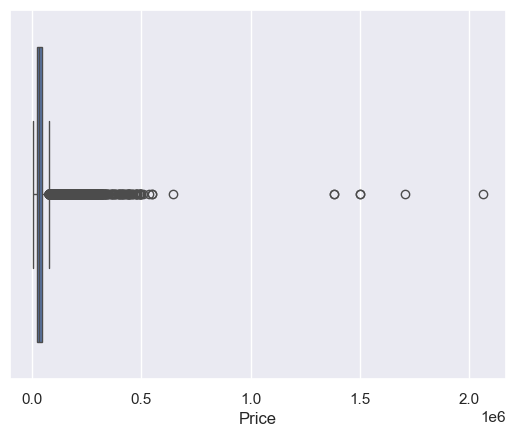

In [19]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Horsepower'>

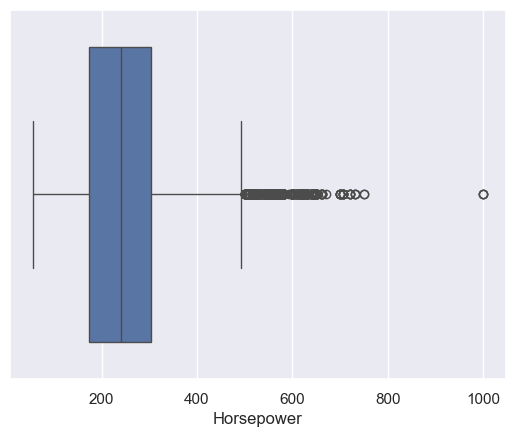

In [20]:
sns.boxplot(x=df['Horsepower'])

<Axes: xlabel='Cylinders'>

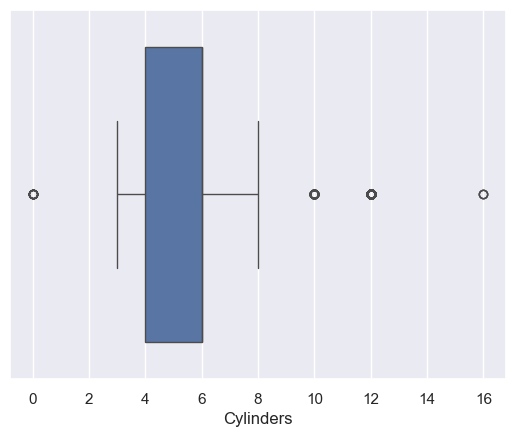

In [21]:
sns.boxplot(x=df['Cylinders'])

In [22]:
numerical_df = df.select_dtypes(include='number')
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year               9.0
Horsepower       129.0
Cylinders          2.0
MPG-Highway        8.0
MPG-City           6.0
Rank            1460.0
Price          21305.0
dtype: float64


As it's not necessary to understand each one individually. What's important is knowing how to apply this technique to remove the outliers effectively.

In [23]:
df = df[~((numerical_df < (Q1 - 1.5 * IQR)) |(numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8425, 10)

#### Outlier Removal Insights

As shown earlier, approximately 1,600 rows were identified as outliers. However, it’s important to note that completely removing all outliers is not always feasible. Even after applying the technique mentioned above, there may still be few outliers that remain.

This is perfectly acceptable, as the original dataset contained over 100 outliers. In cases like this, removing most outliers is already a significant improvement — something is better than nothing.

## 9. Discovering the automotive industry through data visualization

### The largest car maker in the dataset: Chevrolet

In the cars dataset there are multiple automotive makers. In order to discover which makers are producing the most numbers of cars the Pandas' `value_counts` can be utilized to get a series of unique car makers. After filtering the results and restricting it to the first 40 producers the bar plot below is produced. The plot clearly shows that Chevrolet counts the most number of cars.

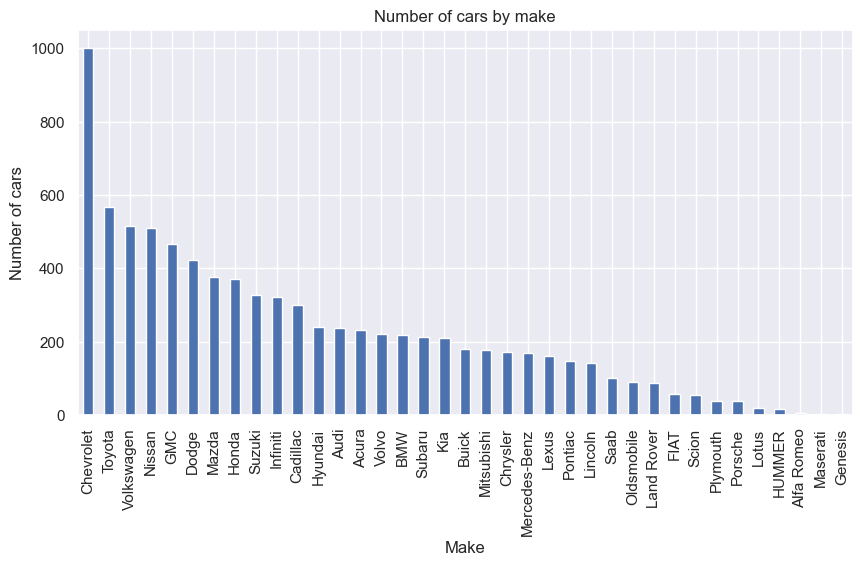

In [24]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Cars prices range

To show the number of cars in a specific price range, the dataset can be splitted into different bins of 10'000 dollars each, until reaching the 90'000 dollars price range. A boxplot can be used to display the price ranges. Cars from the price range from 20 thousands dollars to 30 thousands is the price range with the most number of cars counted.

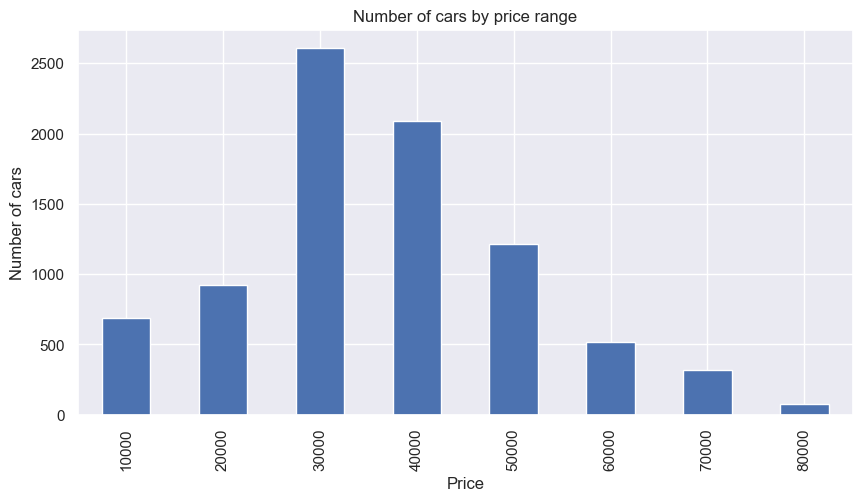

In [25]:
bins = [bin for bin in range(0, 90000, 10000)]
price_bins = pd.cut(df['Price'], bins=bins)

bin_edges = price_bins.cat.categories.right
bin_edges_sorted = sorted(bin_edges)
car_counts = df['Price'].value_counts(bins=bins)
car_counts_sorted = car_counts.reindex(bin_edges_sorted)

# Plot the bar chart
car_counts_sorted.plot(kind='bar', figsize=(10, 5))
plt.title("Number of cars by price range")
plt.ylabel('Number of cars')
plt.xlabel('Price');

### A surge in car prices in the year 2000

With the Pandas `groupby` function, the Price mean is calculated for each year. Later, a time serires plot is produced to see the fluctuation of price over the years.

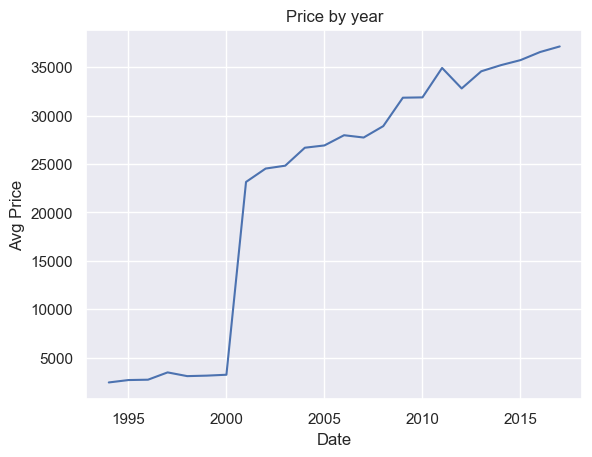

In [26]:
price_yearly_mean = df.groupby(df['Year'])['Price'].mean()
plt.plot(price_yearly_mean)
plt.xlabel('Date')
plt.ylabel('Avg Price')
plt.title('Price by year')
plt.show()

### Automatic transmission cars are more popular

To better understand the number of manual transimission car compared to automatic transmission, a time series line graph can be produced. First, the dataset can be filtered if the `Transmission` field is labeled with either `manual` or `automatic`. After using the `groupby` function for calculating the number of the transmission type for each year, it is clear that after the year 2000 Automatic transmission cars have been more more popular in the dataset.

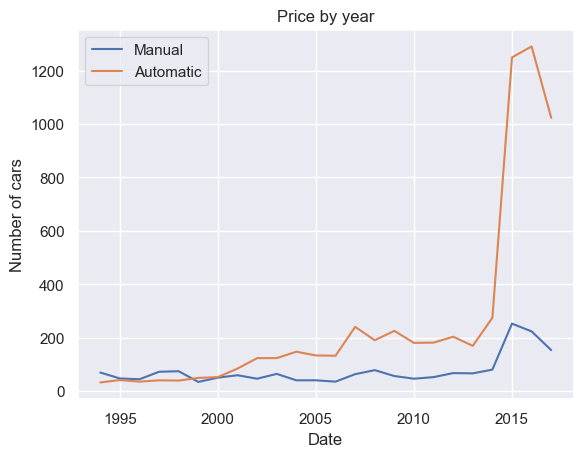

In [27]:
manual_transmission_df = df[df['Transmission'].str.lower() == 'manual']
manual_counts_by_year = manual_transmission_df.groupby('Year').size()

automatic_transmission_df = df[df['Transmission'].str.lower() == 'automatic']
automatic_counts_by_year = automatic_transmission_df.groupby('Year').size()

plt.plot(manual_counts_by_year, label='Manual')
plt.plot(automatic_counts_by_year, label='Automatic')
plt.xlabel('Date')
plt.ylabel('Number of cars')
plt.title('Price by year')
plt.legend()
plt.show()

### Increasing car horsepower has led to increased fuel consumption

The following two line chart plots are showing the increase of car's horsepower as well as an increase of miles-per-gallon consumption. With the usage of the `groupby` function we were able to calculate the mean of car's horsepower and miles-per-gallon consumption for each year.

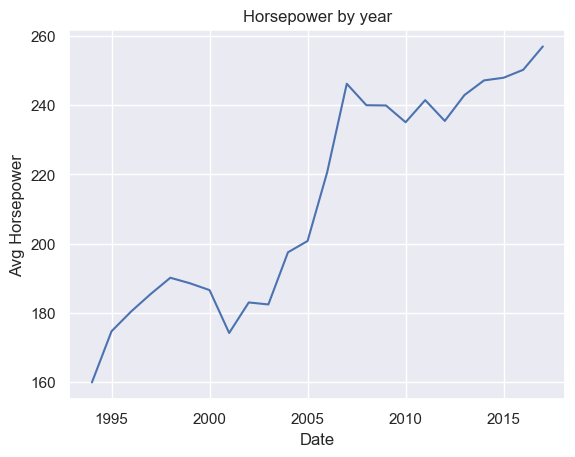

In [28]:
hp_yearly_mean = df.groupby(df['Year'])['Horsepower'].mean()
plt.plot(hp_yearly_mean, label='Horsepower')
plt.xlabel('Date')
plt.ylabel('Avg Horsepower')
plt.title('Horsepower by year')
plt.show()

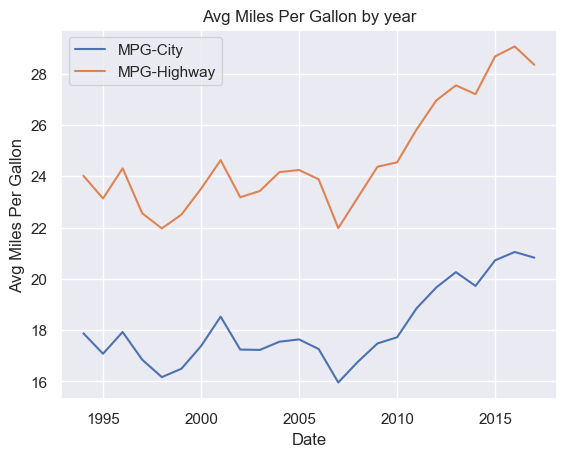

In [29]:
mpg_city_yearly_mean = df.groupby(df['Year'])['MPG-City'].mean()
mpg_highway_yearly_mean = df.groupby(df['Year'])['MPG-Highway'].mean()
plt.plot(mpg_city_yearly_mean, label='MPG-City')
plt.plot(mpg_highway_yearly_mean, label='MPG-Highway')
plt.xlabel('Date')
plt.ylabel('Avg Miles Per Gallon')
plt.title('Avg Miles Per Gallon by year')
plt.legend()
plt.show()

### Car price is influenced by horsepower and cylinder count

For each numeric variable, which we can compute with the Pandas `select_dtypes`, we can calulate a correlation matrix and show it as an heat map where each cell is colored based on its value. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

<Axes: >

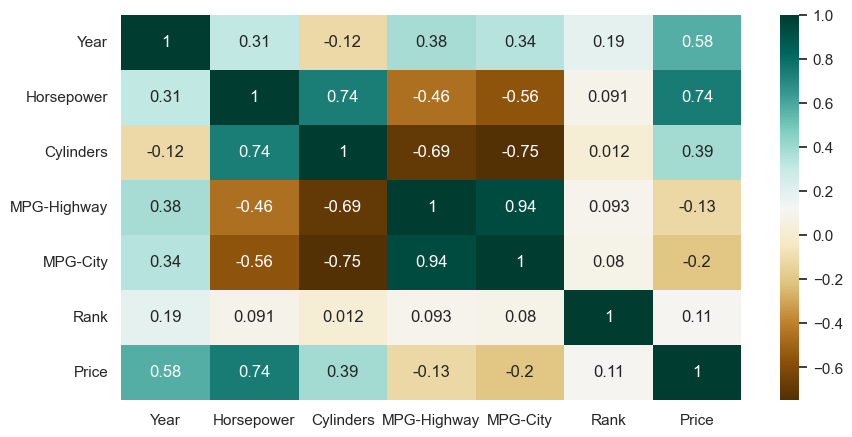

In [30]:
# using only numeric data for correlation map
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,5))
correlation = numeric_df.corr()
sns.heatmap(correlation,cmap="BrBG",annot=True)

### Higher the price, higher the horsepower

A scatterplot will show each record, in our case, each car in a horizontal and vertical axis. In this case we are interested in learning more about how prices are affected by a car's horsepower. With the plot given below, by using price as our y-axis and horsepower as our y-axis we can see that higher the horsepower the price will also be higher.

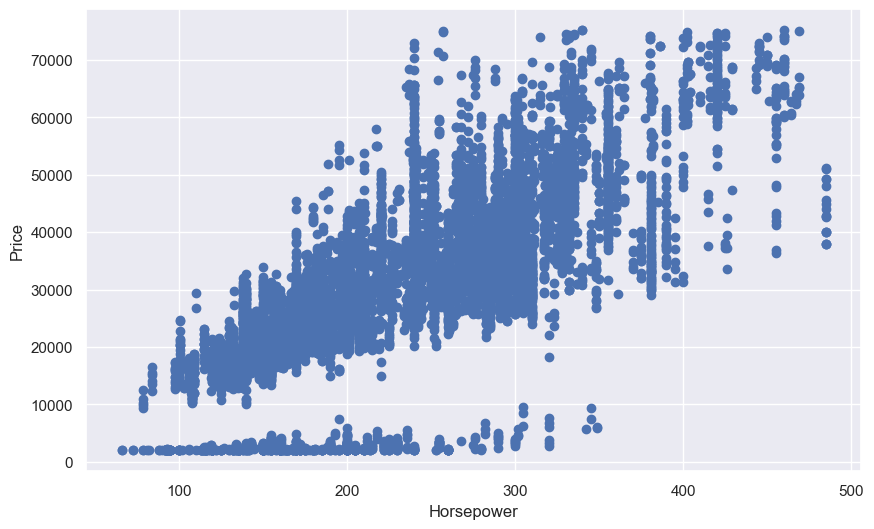

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Horsepower'], df['Price'])
ax.set_xlabel('Horsepower')
ax.set_ylabel('Price')
plt.show()

# Thank you